In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [6]:
x=df.drop(columns=['Survived'])
y=df['Survived']


In [7]:
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
x_train.shape

(712, 3)

In [9]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

mean_Fare=x_train['Fare'].mean()
median_Fare=x_train['Fare'].median()

In [10]:
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)

x_train['Fare_median']=x_train['Fare'].fillna(median_Fare)
x_train['Fare_mean']=x_train['Fare'].fillna(mean_Fare)

In [11]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
23,28.0,35.500,0,28.0,28.0,35.500,35.500
880,25.0,26.000,1,25.0,25.0,26.000,26.000
619,26.0,10.500,0,26.0,26.0,10.500,10.500
542,11.0,31.275,6,11.0,11.0,31.275,31.275
720,6.0,33.000,1,6.0,6.0,33.000,33.000


we have to check variance afte imputing value


In [12]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['Age_median'].var())
print('Age Variance after mean imputation: ', x_train['Age_mean'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', x_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


In [13]:
import matplotlib.pyplot as plt

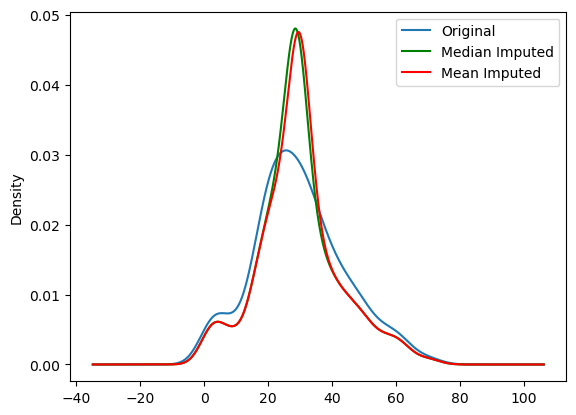

In [14]:
# let's see how we got difference in distribution

fig, ax = plt.subplots()

#orignal variable distribution
x_train['Age'].plot(kind='kde', ax=ax, label='Original')

#variable imputed with median
x_train['Age_median'].plot(kind='kde', ax=ax, color='green', label='Median Imputed')

#variable imputed with mean
x_train['Age_mean'].plot(kind='kde', ax=ax, color='red', label='Mean Imputed')

#add legends
ax.legend(loc='best')


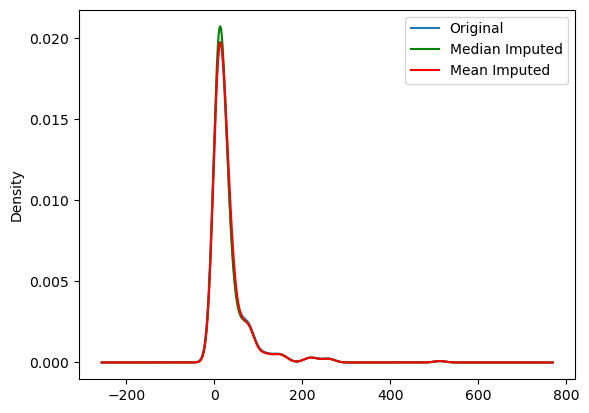

In [15]:
# let's see how we got difference in distribution

fig, ax = plt.subplots()

#orignal variable distribution
x_train['Fare'].plot(kind='kde', ax=ax, label='Original')

#variable imputed with median
x_train['Fare_median'].plot(kind='kde', ax=ax, color='green', label='Median Imputed')

#variable imputed with mean
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='red', label='Mean Imputed')

#add legends
ax.legend(loc='best')


In [16]:
# now check covariace and co-relation with other column

x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [17]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

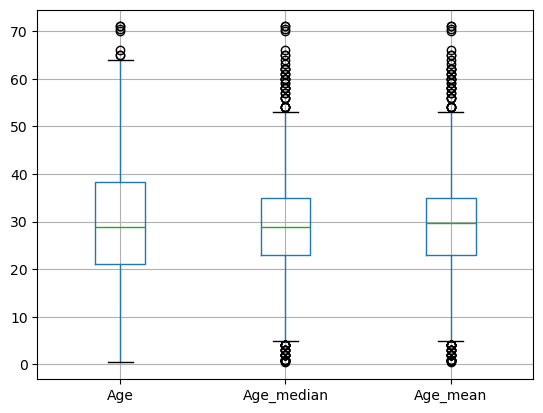

In [18]:
x_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

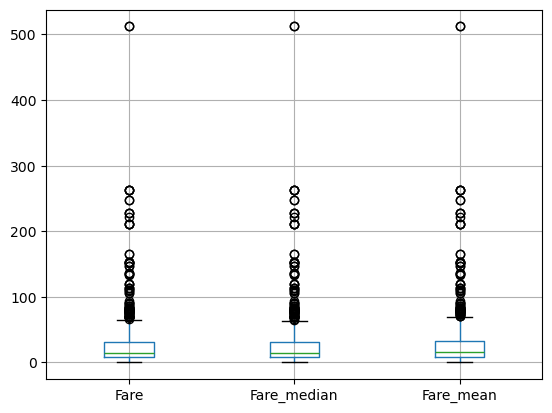

In [19]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()

<h2> Using sklearn </h2>

In [59]:
x_train , x_test , y_train , y_test= train_test_split(x,y,test_size=0.2, random_state=2)

In [21]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')




In [60]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [51]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
], remainder='passthrough')

In [52]:
trf.fit(x_train)

/home/narendra/anaconda3/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [53]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [54]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [58]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

ValueError: Specifying the columns using strings is only supported for dataframes.

In [56]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [57]:
pd.DataFrame(x_train)

,0,1,2
0,40.00,27.7208,0.0
1,4.00,16.7000,2.0
2,47.00,9.0000,0.0
3,9.00,31.3875,6.0
4,20.00,9.8458,0.0
...,...,...,...
707,30.00,8.6625,0.0
708,28.75,8.7125,0.0
709,71.00,49.5042,0.0
710,28.75,221.7792,0.0
